In [25]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
%matplotlib inline

In [26]:
# 1, 데이터 가져오기
load_diabetes()['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [27]:
# 2~3. 모델에 입력할 X, y 데이터 준비
df_X = np.array(load_diabetes()['data'])
df_y = np.array(load_diabetes()['target'])

In [28]:
display(df_X.shape)
display(df_y.shape)
display(df_X[:5,:])
display(df_y[:5])

(442, 10)

(442,)

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

array([151.,  75., 141., 206., 135.])

In [29]:
# 4. train 데이터와 test 데이터로 분리하기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)

In [30]:
# 5. 모델 준비하기
def model(X, W, b):
    predictions = 0
    for i in range(10):
       predictions += X[:, i]*W[i]
    predictions += b
    return predictions

# 6. 손실함수 loss 정의하기
def MSE(a, b):
    mse = ((a-b)**2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

# 7. 기울기를 구하는 gradient 함수 구현하기
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [31]:
# 8~9. 하이퍼 파라미터 학습률 설정 및 모델 학습 수행
def model_learning(X, y, n_est, mue):
    W = np.random.rand(10)
    b = random.random()
    losses = []
    W_list = [W]
    b_list = [b]
    
    for i in range(1, n_est+1):
        dW, db = gradient(X_train, W, b, y_train)
        W -= mue * dW
        b -= mue * db
        L = loss(X_train, W, b, y_train)
        losses.append(L)
        W_list.append(W)
        b_list.append(b)
        if i % 10 == 0:
            print('Iteration %d : Loss %0.4f' % (i, L))
    
    return W_list, b_list, losses

In [36]:
W_df, b_df, losses_df = model_learning(X_train, y_train, n_est = 10000, mue = 0.1)

Iteration 10 : Loss 6299.6934
Iteration 20 : Loss 5955.0492
Iteration 30 : Loss 5870.4462
Iteration 40 : Loss 5791.5138
Iteration 50 : Loss 5715.2224
Iteration 60 : Loss 5641.4437
Iteration 70 : Loss 5570.0864
Iteration 80 : Loss 5501.0630
Iteration 90 : Loss 5434.2891
Iteration 100 : Loss 5369.6836
Iteration 110 : Loss 5307.1684
Iteration 120 : Loss 5246.6681
Iteration 130 : Loss 5188.1104
Iteration 140 : Loss 5131.4254
Iteration 150 : Loss 5076.5460
Iteration 160 : Loss 5023.4075
Iteration 170 : Loss 4971.9477
Iteration 180 : Loss 4922.1064
Iteration 190 : Loss 4873.8260
Iteration 200 : Loss 4827.0509
Iteration 210 : Loss 4781.7274
Iteration 220 : Loss 4737.8040
Iteration 230 : Loss 4695.2311
Iteration 240 : Loss 4653.9608
Iteration 250 : Loss 4613.9471
Iteration 260 : Loss 4575.1455
Iteration 270 : Loss 4537.5133
Iteration 280 : Loss 4501.0095
Iteration 290 : Loss 4465.5943
Iteration 300 : Loss 4431.2296
Iteration 310 : Loss 4397.8787
Iteration 320 : Loss 4365.5060
Iteration 330 : L

Iteration 3210 : Loss 2831.1354
Iteration 3220 : Loss 2830.4692
Iteration 3230 : Loss 2829.8088
Iteration 3240 : Loss 2829.1542
Iteration 3250 : Loss 2828.5053
Iteration 3260 : Loss 2827.8620
Iteration 3270 : Loss 2827.2243
Iteration 3280 : Loss 2826.5922
Iteration 3290 : Loss 2825.9655
Iteration 3300 : Loss 2825.3443
Iteration 3310 : Loss 2824.7285
Iteration 3320 : Loss 2824.1180
Iteration 3330 : Loss 2823.5128
Iteration 3340 : Loss 2822.9128
Iteration 3350 : Loss 2822.3181
Iteration 3360 : Loss 2821.7284
Iteration 3370 : Loss 2821.1439
Iteration 3380 : Loss 2820.5645
Iteration 3390 : Loss 2819.9900
Iteration 3400 : Loss 2819.4206
Iteration 3410 : Loss 2818.8560
Iteration 3420 : Loss 2818.2963
Iteration 3430 : Loss 2817.7414
Iteration 3440 : Loss 2817.1914
Iteration 3450 : Loss 2816.6460
Iteration 3460 : Loss 2816.1054
Iteration 3470 : Loss 2815.5694
Iteration 3480 : Loss 2815.0381
Iteration 3490 : Loss 2814.5113
Iteration 3500 : Loss 2813.9890
Iteration 3510 : Loss 2813.4713
Iteratio

Iteration 6260 : Loss 2757.9413
Iteration 6270 : Loss 2757.8856
Iteration 6280 : Loss 2757.8303
Iteration 6290 : Loss 2757.7755
Iteration 6300 : Loss 2757.7210
Iteration 6310 : Loss 2757.6669
Iteration 6320 : Loss 2757.6133
Iteration 6330 : Loss 2757.5600
Iteration 6340 : Loss 2757.5072
Iteration 6350 : Loss 2757.4547
Iteration 6360 : Loss 2757.4026
Iteration 6370 : Loss 2757.3509
Iteration 6380 : Loss 2757.2996
Iteration 6390 : Loss 2757.2486
Iteration 6400 : Loss 2757.1980
Iteration 6410 : Loss 2757.1478
Iteration 6420 : Loss 2757.0980
Iteration 6430 : Loss 2757.0486
Iteration 6440 : Loss 2756.9995
Iteration 6450 : Loss 2756.9507
Iteration 6460 : Loss 2756.9023
Iteration 6470 : Loss 2756.8543
Iteration 6480 : Loss 2756.8066
Iteration 6490 : Loss 2756.7593
Iteration 6500 : Loss 2756.7123
Iteration 6510 : Loss 2756.6657
Iteration 6520 : Loss 2756.6194
Iteration 6530 : Loss 2756.5734
Iteration 6540 : Loss 2756.5278
Iteration 6550 : Loss 2756.4825
Iteration 6560 : Loss 2756.4375
Iteratio

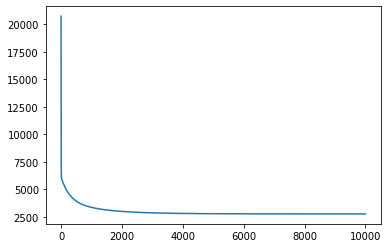

In [37]:
plt.plot(losses_df)
plt.show()

In [38]:
# loss가 최소일 때 계수 값 도출
def get_min_vel(W_L, b_L, L_L):
    L_L_min = min(L_L)
    num = L_L.index(L_L_min)
    W_L_min = W_L[num+1]
    b_L_min = b_L[num+1]
    return W_L_min, b_L_min, L_L_min

In [39]:
W_min, b_min, losses_min = get_min_vel(W_df, b_df, losses_df)
print(W_min)
print(b_min)
print(losses_min)

[ -29.78651209 -239.42223148  568.48062641  299.2032039   -77.42936252
 -150.3169209  -225.87633375  120.26512267  485.56287297   60.50438872]
152.38023550266453
2750.4070886631575


In [40]:
prediction = model(X_test, W_min, b_min)
mse = loss(X_test, W_min, b_min, y_test)
mse

3451.106492581432

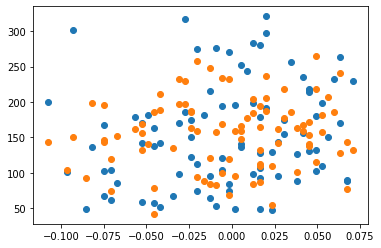

In [41]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()